# Project 1

Minh Tu Bui, Juliana Rosa, Camilo Velez

# <center> <span style="color:#fc031c"> Empirical Analyisis of Crime in Montgomery County </center> </span>

# Introduction

There are few opportunites to study crime in what economists call "natural experiments". Since *more crime* is not considered a positive outcome in a city, it would not be possible to perform studies -as it is possible in other fields- where one could control certain variables, given that the possible outcome of more crime would probably hurt people. For example, how can we agree on sending 2000 extra police officers for a year to a county to see if increased police is actually beneficial for a reduction in crime?

However, during the quarantine in 2020 due to COVID-19, the opportunities were such for one of this natural experiments. We predict that many studies observing how crime statistics changed during these months will come in the next years.

In this project, we study the crime data for Montgomery County that it is available at Montomgery County Open Data Portal. The data is provided by the Montgomery Police Department. According to the description of the dataset: 
*The data presented is derived from reported crimes classified according to the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program and documented by approved police incident reports.*

[Link to data](https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3)

## Questions we are interested in:

* Which crimes usually have more than 1 victim? 

* How does the distribution of crime frequencies look like over the years and months? 

* Which months usually have a higher crime frequency?

* What were the changes in crime reports from 2019 to 2020? 

* How do crimes change from one police district to another over time? 

* What are the most common types of crimes? Does that change over the years? Does it relate do the police district? 

* Which cities have a higher crime rate? 

* How does crime frequency change throughout the day? 

* What would be a good estimate for the median of the hour when the crime started? How about the median of the distance between the police station and the crime location?

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [2]:
!pip install vincenty
from vincenty import vincenty

### Reading the csv file

In [3]:
crime = pd.read_csv("Crime.csv")

C:\Users\Tu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Taking a look at the data

In [4]:
#Number of rows and columns; column names and types
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225690 entries, 0 to 225689
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             225690 non-null  int64  
 1   Offence Code            225690 non-null  object 
 2   CR Number               225690 non-null  int64  
 3   Dispatch Date / Time    156890 non-null  object 
 4   NIBRS Code              225690 non-null  object 
 5   Victims                 225690 non-null  int64  
 6   Crime Name1             225549 non-null  object 
 7   Crime Name2             225549 non-null  object 
 8   Crime Name3             225549 non-null  object 
 9   Police District Name    225690 non-null  object 
 10  Block Address           205188 non-null  object 
 11  City                    224633 non-null  object 
 12  State                   225690 non-null  object 
 13  Zip Code                222503 non-null  float64
 14  Agency              

In [5]:
#First four rows
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201087097,5707,16033232,NaN,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,...,NaN,CONNECTICUT,NaN,AVE,07/01/2016 12:04:00 AM,NaN,39.078911,-77.080827,4D,"(39.0789, -77.0808)"
1,201215730,5311,180058531,11/22/2018 04:58:01 AM,90C,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,CITY OF TAKOMA PARK,...,NaN,NEW HAMPSHIRE,NaN,AVE,11/22/2018 04:58:00 AM,11/22/2018 10:00:00 AM,38.973022,-76.996799,8D,"(38.973, -76.9968)"
2,201229073,3562,190009928,03/03/2019 04:59:49 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,OVERLEA,NaN,RD,03/03/2019 04:52:00 AM,03/03/2019 04:57:00 AM,38.956840,-77.111362,2D,"(38.9568, -77.1114)"
3,201233523,1114,190015440,04/03/2019 11:53:15 AM,11B,1,Crime Against Person,Forcible Sodomy,SEX ASSAULT - SODOMY-GIRL-STRONG-ARM,SILVER SPRING,...,NaN,UNIVERSITY,E,BLV,04/02/2019 11:00:00 AM,04/02/2019 12:00:00 PM,39.020392,-77.012776,3D,"(39.0204, -77.0128)"
4,201276479,1213,200005863,02/04/2020 07:11:25 PM,120,1,Crime Against Property,Robbery,ROBBERY - GUN,MONTGOMERY VILLAGE,...,NaN,DARNESTOWN,NaN,RD,02/04/2020 07:05:00 PM,02/04/2020 07:10:00 PM,39.116987,-77.249952,6D,"(39.117, -77.25)"


# <center> Exploratory Data Analysis </center>

In [6]:
df_c = crime.copy()

In [7]:
df_c

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201087097,5707,16033232,NaN,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,...,NaN,CONNECTICUT,NaN,AVE,07/01/2016 12:04:00 AM,NaN,39.078911,-77.080827,4D,"(39.0789, -77.0808)"
1,201215730,5311,180058531,11/22/2018 04:58:01 AM,90C,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,CITY OF TAKOMA PARK,...,NaN,NEW HAMPSHIRE,NaN,AVE,11/22/2018 04:58:00 AM,11/22/2018 10:00:00 AM,38.973022,-76.996799,8D,"(38.973, -76.9968)"
2,201229073,3562,190009928,03/03/2019 04:59:49 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,OVERLEA,NaN,RD,03/03/2019 04:52:00 AM,03/03/2019 04:57:00 AM,38.956840,-77.111362,2D,"(38.9568, -77.1114)"
3,201233523,1114,190015440,04/03/2019 11:53:15 AM,11B,1,Crime Against Person,Forcible Sodomy,SEX ASSAULT - SODOMY-GIRL-STRONG-ARM,SILVER SPRING,...,NaN,UNIVERSITY,E,BLV,04/02/2019 11:00:00 AM,04/02/2019 12:00:00 PM,39.020392,-77.012776,3D,"(39.0204, -77.0128)"
4,201276479,1213,200005863,02/04/2020 07:11:25 PM,120,1,Crime Against Property,Robbery,ROBBERY - GUN,MONTGOMERY VILLAGE,...,NaN,DARNESTOWN,NaN,RD,02/04/2020 07:05:00 PM,02/04/2020 07:10:00 PM,39.116987,-77.249952,6D,"(39.117, -77.25)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225685,201246678,5404,190031813,07/04/2019 01:05:53 AM,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,WHEATON,...,NaN,GEORGIA,NaN,AVE,07/04/2019 01:03:00 AM,07/04/2019 02:28:00 AM,39.058066,-77.050032,4D,"(39.0581, -77.05)"
225686,201243750,2203,190028212,06/13/2019 10:33:01 AM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - FORCED ENTRY-NONRESIDENTIAL,SILVER SPRING,...,NaN,SLIGO,NaN,AVE,06/13/2019 10:33:00 AM,06/13/2019 11:30:00 AM,38.990216,-77.024017,3D,"(38.9902, -77.024)"
225687,201244611,2309,190029400,06/19/2019 08:22:39 PM,23H,1,Crime Against Property,All other Larceny,LARCENY - FROM YARDS,SILVER SPRING,...,NaN,REGALWOOD,NaN,TER,04/19/2019 12:00:00 PM,06/19/2019 08:22:00 PM,39.098924,-76.920850,3D,"(39.0989, -76.9208)"
225688,201248696,4104,190034187,07/18/2019 06:48:53 PM,90G,1,Crime Against Society,Liquor Law Violations,LIQUOR - POSSESS,ROCKVILLE,...,NaN,MEADOW HALL,NaN,DR,07/18/2019 06:48:00 PM,NaN,39.075179,-77.112958,1D,"(39.0752, -77.113)"


In [8]:
df_c.columns.str.replace(' ', '_')

Index(['Incident_ID', 'Offence_Code', 'CR_Number', 'Dispatch_Date_/_Time',
       'NIBRS_Code', 'Victims', 'Crime_Name1', 'Crime_Name2', 'Crime_Name3',
       'Police_District_Name', 'Block_Address', 'City', 'State', 'Zip_Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address_Number',
       'Street_Prefix', 'Street_Name', 'Street_Suffix', 'Street_Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police_District_Number', 'Location'],
      dtype='object')

In [9]:
df_c.columns = df_c.columns.str.replace(' ', '_')

In [10]:
df_c = df_c[['Incident_ID', 'Offence_Code', 'CR_Number', 'Victims', 'Crime_Name1', 'Crime_Name2', 'Crime_Name3', 'Start_Date_Time']]

In [11]:
df_c.head()

,Incident_ID,Offence_Code,CR_Number,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Start_Date_Time
0,201087097,5707,16033232,1,Crime Against Society,Trespass of Real Property,TRESPASSING,07/01/2016 12:04:00 AM
1,201215730,5311,180058531,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,11/22/2018 04:58:00 AM
2,201229073,3562,190009928,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,03/03/2019 04:52:00 AM
3,201233523,1114,190015440,1,Crime Against Person,Forcible Sodomy,SEX ASSAULT - SODOMY-GIRL-STRONG-ARM,04/02/2019 11:00:00 AM
4,201276479,1213,200005863,1,Crime Against Property,Robbery,ROBBERY - GUN,02/04/2020 07:05:00 PM


In [12]:
df_c[df_c['Victims']>1]['Crime_Name2'].unique()

array(['Simple Assault', 'Aggravated Assault', 'All Other Offenses',
       'Forcible Sodomy', 'Fondling', 'Forcible Fondling',
       'Sexual Assault With An Object', 'Intimidation', 'Forcible Rape',
       'Human Trafficking, Commercial Sex Acts', 'Runaway',
       'Murder and Nonnegligent Manslaughter', nan,
       'Kidnapping/Abduction'], dtype=object)

In [13]:
df_c.Crime_Name2.unique()

array(['Trespass of Real Property', 'Disorderly Conduct',
       'Drug/Narcotic Violations', 'Forcible Sodomy', 'Robbery',
       'Identity Theft', 'Motor Vehicle Theft',
       'Theft of Motor Vehicle Parts or Accessories',
       'All Other Offenses', 'Theft From Motor Vehicle',
       'Liquor Law Violations', 'Fondling', 'Shoplifting',
       'Simple Assault', 'Driving Under the Influence', 'Impersonation',
       'Destruction/Damage/Vandalism of Property', 'All other Larceny',
       'Credit Card/Automatic Teller Machine Fraud',
       'Burglary/Breaking and Entering', 'Sexual Assault With An Object',
       'Weapon Law Violations', 'Theft from Building',
       'False Pretenses/Swindle/Confidence Game', 'Forcible Rape',
       'Counterfeiting/Forgery', 'Runaway', 'Aggravated Assault',
       'Pocket/picking', 'Drug Equipment Violations', 'Forcible Fondling',
       'Intimidation', 'Arson', 'Extortion/Blackmail', 'Not Mapped',
       'Pornography/Obscene Material', 'Purse-snatching

I will focus on Drug/Narcotic Violations, Motor Vehicle Theft, Theft of Motor Vehicle Parts or Accessories, Driving under the Influence, Burglary/Breaking and Entering, Forcible Rape. 7 categories

In [14]:
my_list = ['Drug/Narcotic Violations', 'Motor Vehicle Theft', 'Theft of Motor Vehicle Parts or Accessories', 'Driving under the Influence', 'Burglary/Breaking and Entering', 'Forcible Rape']

In [15]:
df_2 = df_c[df_c['Crime_Name2'].isin(my_list)]

In [16]:
df_2['Date'] = pd.to_datetime(df_2['Start_Date_Time'])

C:\Users\Tu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_2['Date'] = pd.to_datetime(df_2['Start_Date_Time']).dt.date

C:\Users\Tu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_2.head()

,Incident_ID,Offence_Code,CR_Number,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Start_Date_Time,Date
2,201229073,3562,190009928,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,03/03/2019 04:52:00 AM,2019-03-03
5,201279553,3562,200009724,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,02/27/2020 11:45:00 AM,2020-02-27
6,201087102,3562,16033238,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,07/01/2016 12:58:00 AM,2016-07-01
8,201087139,3512,16033280,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - HEROIN - POSSESS,07/01/2016 09:30:00 AM,2016-07-01
9,201251833,2404,190038194,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,08/10/2019 10:00:00 AM,2019-08-10


In [19]:
df_2['Time'] = pd.to_datetime(df_2['Start_Date_Time']).dt.time

C:\Users\Tu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_2.head()

,Incident_ID,Offence_Code,CR_Number,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Start_Date_Time,Date,Time
2,201229073,3562,190009928,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,03/03/2019 04:52:00 AM,2019-03-03,04:52:00
5,201279553,3562,200009724,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,02/27/2020 11:45:00 AM,2020-02-27,11:45:00
6,201087102,3562,16033238,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,07/01/2016 12:58:00 AM,2016-07-01,00:58:00
8,201087139,3512,16033280,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - HEROIN - POSSESS,07/01/2016 09:30:00 AM,2016-07-01,09:30:00
9,201251833,2404,190038194,1,Crime Against Property,Motor Vehicle Theft,AUTO THEFT - VEHICLE THEFT,08/10/2019 10:00:00 AM,2019-08-10,10:00:00


In [21]:
df_2.dtypes

Incident_ID         int64
Offence_Code       object
CR_Number           int64
Victims             int64
Crime_Name1        object
Crime_Name2        object
Crime_Name3        object
Start_Date_Time    object
Date               object
Time               object
dtype: object

In [22]:
df_2['Date'] = pd.to_datetime(df_2['Date'])

C:\Users\Tu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
daily = df_2.groupby(df_2['Date'])[['Incident_ID', 'Victims']].agg(['count']).reset_index()

In [24]:
daily.columns

MultiIndex([(       'Date',      ''),
            ('Incident_ID', 'count'),
            (    'Victims', 'count')],
           )

In [25]:
daily.columns = ['Date', 'Incidents', 'Victims']

In [26]:
daily

,Date,Incidents,Victims
0,2016-07-01,37,37
1,2016-07-02,28,28
2,2016-07-03,29,29
3,2016-07-04,17,17
4,2016-07-05,33,33
...,...,...,...
1576,2020-10-24,11,11
1577,2020-10-25,11,11
1578,2020-10-26,15,15
1579,2020-10-27,8,8


In [27]:
daily.dtypes

Date         datetime64[ns]
Incidents             int64
Victims               int64
dtype: object

In [28]:
monthly = daily.groupby([daily.Date.dt.year, daily.Date.dt.month])[['Incidents', 'Victims']].agg(['sum'])

In [29]:
monthly.tail()

Incidents Victims
                sum     sum
Date Date                  
2020 6          381     381
     7          480     480
     8          488     488
     9          484     484
     10         365     365

In [30]:
monthly.columns

MultiIndex([('Incidents', 'sum'),
            (  'Victims', 'sum')],
           )

In [31]:
monthly.index = monthly.index.set_names(['Year', 'Month'])

In [32]:
monthly.reset_index(inplace=True)

In [33]:
monthly.head()

,Year,Month,Incidents,Victims
,,,sum,sum
0,2016,7,797,797
1,2016,8,765,765
2,2016,9,762,762
3,2016,10,761,761
4,2016,11,755,755


In [34]:
monthly.columns = ['Year', 'Month', 'Incidents', 'Victims']

In [35]:
monthly.head()

,Year,Month,Incidents,Victims
0,2016,7,797,797
1,2016,8,765,765
2,2016,9,762,762
3,2016,10,761,761
4,2016,11,755,755


In [36]:
dates_x = pd.date_range('2016-07-01', '2020-11-01', freq='M')

In [37]:
monthly['x_axis'] = dates_x

In [38]:
monthly.head()

,Year,Month,Incidents,Victims,x_axis
0,2016,7,797,797,2016-07-31
1,2016,8,765,765,2016-08-31
2,2016,9,762,762,2016-09-30
3,2016,10,761,761,2016-10-31
4,2016,11,755,755,2016-11-30


In [39]:
monthly = monthly[monthly['Year']>=2017].reset_index(drop=True)

In [40]:
monthly.head()

,Year,Month,Incidents,Victims,x_axis
0,2017,1,812,812,2017-01-31
1,2017,2,731,731,2017-02-28
2,2017,3,755,755,2017-03-31
3,2017,4,720,720,2017-04-30
4,2017,5,812,812,2017-05-31


In [41]:
monthly['Year'] = monthly['Year'].astype('category')

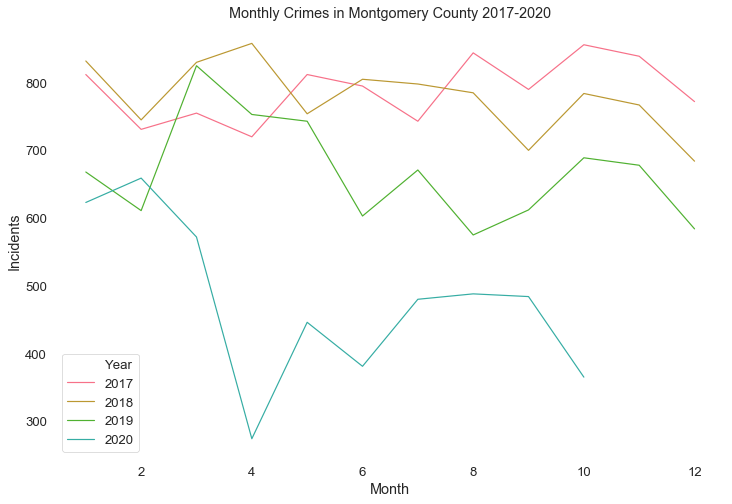

In [42]:
sns.set(context = 'paper', rc={'figure.figsize':(12,8), 'figure.facecolor':'white', 'axes.facecolor':'white'}, font_scale=1.5)
sns.set_palette('husl')
g1 = sns.lineplot(x='Month', y='Incidents', data=monthly, hue='Year')
plt.title('Monthly Crimes in Montgomery County 2017-2020')
plt.savefig('CrimesMoco.png')

In [43]:
sum(monthly['Incidents']<monthly['Victims'])

0

In [44]:
avg = monthly[monthly['Year'].astype(int)<2020].groupby('Month')['Incidents'].agg(['mean']).reset_index()

In [45]:
avg.columns = ['Month', 'Mean']

In [46]:
avg

,Month,Mean
0,1,770.666667
1,2,695.666667
2,3,803.333333
3,4,777.000000
4,5,769.666667
5,6,734.333333
6,7,737.333333
7,8,734.666667
8,9,700.666667
9,10,776.333333


In [47]:
monthly_20 = monthly[monthly['Year']==2020]

In [48]:
monthly_20

,Year,Month,Incidents,Victims,x_axis
36,2020,1,623,623,2020-01-31
37,2020,2,659,659,2020-02-29
38,2020,3,572,572,2020-03-31
39,2020,4,274,274,2020-04-30
40,2020,5,446,446,2020-05-31
41,2020,6,381,381,2020-06-30
42,2020,7,480,480,2020-07-31
43,2020,8,488,488,2020-08-31
44,2020,9,484,484,2020-09-30
45,2020,10,365,365,2020-10-31


In [49]:
monthly_20 = monthly_20[['Year', 'Month', 'Incidents']]

In [50]:
monthly_20.columns = ['Year', 'Month', 'Incidents_20']

In [51]:
monthly_20 = monthly_20[['Month', 'Incidents_20']]

In [52]:
monthly_20

,Month,Incidents_20
36,1,623
37,2,659
38,3,572
39,4,274
40,5,446
41,6,381
42,7,480
43,8,488
44,9,484
45,10,365


In [53]:
a1 = avg.merge(monthly_20)

In [54]:
a1

,Month,Mean,Incidents_20
0,1,770.666667,623
1,2,695.666667,659
2,3,803.333333,572
3,4,777.000000,274
4,5,769.666667,446
5,6,734.333333,381
6,7,737.333333,480
7,8,734.666667,488
8,9,700.666667,484
9,10,776.333333,365


In [55]:
monthly_19 = monthly[monthly['Year']==2019]

In [56]:
monthly_19

,Year,Month,Incidents,Victims,x_axis
24,2019,1,668,668,2019-01-31
25,2019,2,611,611,2019-02-28
26,2019,3,825,825,2019-03-31
27,2019,4,753,753,2019-04-30
28,2019,5,743,743,2019-05-31
29,2019,6,603,603,2019-06-30
30,2019,7,671,671,2019-07-31
31,2019,8,575,575,2019-08-31
32,2019,9,612,612,2019-09-30
33,2019,10,689,689,2019-10-31


In [57]:
monthly_19 = monthly_19[['Year', 'Month', 'Incidents']]

In [58]:
monthly_19.columns = ['Year', 'Month', 'Incidents_19']

In [59]:
monthly_19 = monthly_19[['Month', 'Incidents_19']]

In [60]:
monthly_19

,Month,Incidents_19
24,1,668
25,2,611
26,3,825
27,4,753
28,5,743
29,6,603
30,7,671
31,8,575
32,9,612
33,10,689


In [61]:
a1 = a1.merge(monthly_19)

In [62]:
a1

,Month,Mean,Incidents_20,Incidents_19
0,1,770.666667,623,668
1,2,695.666667,659,611
2,3,803.333333,572,825
3,4,777.000000,274,753
4,5,769.666667,446,743
5,6,734.333333,381,603
6,7,737.333333,480,671
7,8,734.666667,488,575
8,9,700.666667,484,612
9,10,776.333333,365,689


In [63]:
a1['Change_Against_Mean'] = np.round(((-a1['Mean']+a1['Incidents_20'])/a1['Mean'])*100, 1)

In [64]:
a1

,Month,Mean,Incidents_20,Incidents_19,Change_Against_Mean
0,1,770.666667,623,668,-19.2
1,2,695.666667,659,611,-5.3
2,3,803.333333,572,825,-28.8
3,4,777.000000,274,753,-64.7
4,5,769.666667,446,743,-42.1
5,6,734.333333,381,603,-48.1
6,7,737.333333,480,671,-34.9
7,8,734.666667,488,575,-33.6
8,9,700.666667,484,612,-30.9
9,10,776.333333,365,689,-53.0


In [65]:
a1['Change_Against_2019'] = np.round(((-a1['Incidents_19']+a1['Incidents_20'])/a1['Incidents_19'])*100, 1)

In [66]:
a1

,Month,Mean,Incidents_20,Incidents_19,Change_Against_Mean,Change_Against_2019
0,1,770.666667,623,668,-19.2,-6.7
1,2,695.666667,659,611,-5.3,7.9
2,3,803.333333,572,825,-28.8,-30.7
3,4,777.000000,274,753,-64.7,-63.6
4,5,769.666667,446,743,-42.1,-40.0
5,6,734.333333,381,603,-48.1,-36.8
6,7,737.333333,480,671,-34.9,-28.5
7,8,734.666667,488,575,-33.6,-15.1
8,9,700.666667,484,612,-30.9,-20.9
9,10,776.333333,365,689,-53.0,-47.0


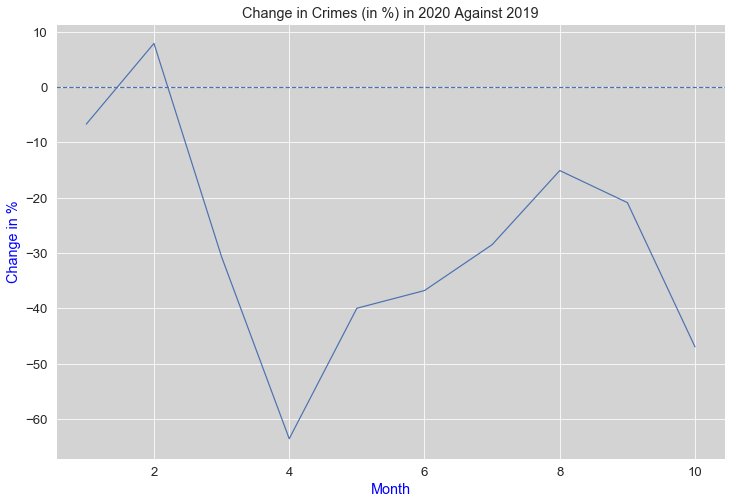

In [67]:
sns.set(context = 'paper', rc={'figure.figsize':(12,8), 'figure.facecolor':'white', 'axes.facecolor':'lightgray', 'axes.labelcolor':'blue'}, font_scale=1.5)
g2 = sns.lineplot(x='Month', y='Change_Against_2019', data=a1)
plt.title('Change in Crimes (in %) in 2020 Against 2019')
plt.ylabel('Change in %')
plt.axhline(0, ls='dashed')
plt.savefig('CrimesMoco2.png')

# <center> Plots for categorical variables </center>

In [68]:
crime_2 = crime.copy()

In [69]:
mpl.rc_file_defaults()

In [70]:
%matplotlib inline
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(inline_rc)

C:\Users\Tu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  
C:\Users\Tu\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Tu\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Tu\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Tu\anaconda3\lib\_collections_abc.py:841: MatplotlibDe

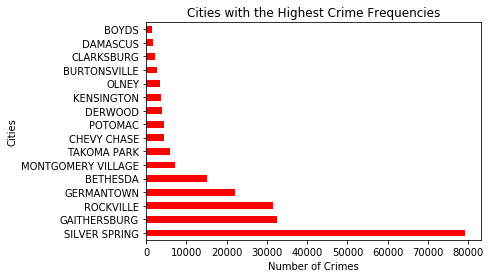

In [71]:
#City
freq = crime_2["City"].value_counts()
freq[freq>1000].plot(kind="barh", color="red")
plt.xlabel("Number of Crimes")
plt.ylabel("Cities")
plt.title("Cities with the Highest Crime Frequencies")
plt.show()

In [72]:
#Converting into datetime
crime_2.Start_Date_Time = pd.to_datetime(crime_2.Start_Date_Time)

In [73]:
#Data Wrangling
crime_2["Year"] = crime_2["Start_Date_Time"].dt.year
crime_2["Type of Crime"] = crime_2["Crime Name1"]

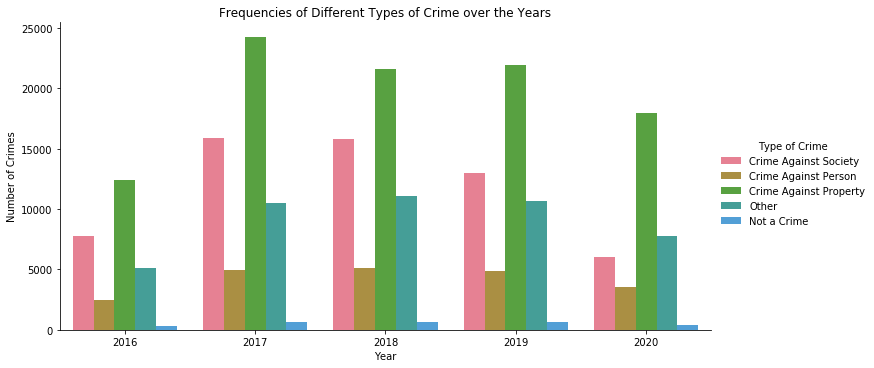

In [74]:
#Year and Type of Crime
sns.set_palette(sns.color_palette("husl"))
sns.catplot(x="Year", data=crime_2, aspect=2, kind='count', hue='Type of Crime', order=range(2016, 2021))
plt.ylabel("Number of Crimes")
plt.title("Frequencies of Different Types of Crime over the Years")
plt.show()

# <center> Quantitative Study </center>

In [75]:
#Creating hour variable
crime_2["Hour"] = crime_2["Start_Date_Time"].dt.hour

In [76]:
#Choosing a Sample
np.random.seed(18012000)
samp = crime_2.iloc[np.random.randint(low=0, high=225690, size=22569)]
samp.shape

(22569, 33)

In [77]:
#Bootstrapping
from sklearn.utils import resample
samps_medians = []
for i in range(1000):
  samps_medians.append(resample(samp)["Hour"].median())

In [78]:
#95% confidence interval for the median
ci = np.percentile(samps_medians, [2.5, 97.5])
ci

array([14., 15.])

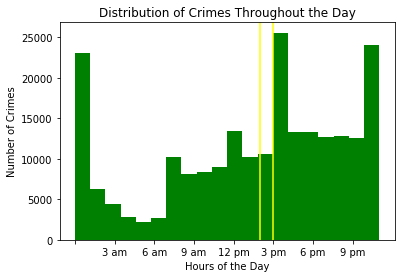

In [79]:
#Histogram
plt.hist(crime_2.Hour, bins=20, color="green")
plt.xlabel("Hours of the Day")
plt.ylabel("Number of Crimes")
plt.title("Distribution of Crimes Throughout the Day")
plt.xticks(ticks=[0, 3, 6, 9, 12, 15, 18, 21], labels=["", "3 am", "6 am", "9 am", "12 pm", "3 pm", "6 pm", "9 pm"])
plt.axvline(14, color="yellow")
plt.axvline(15, color="yellow")
plt.show()

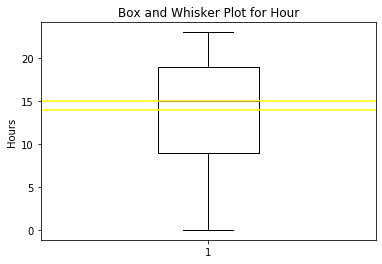

In [80]:
#Box Plot
plt.boxplot(crime_2.Hour, widths=0.3)
plt.ylabel("Hours")
plt.title("Box and Whisker Plot for Hour")
plt.axhline(14, color="yellow")
plt.axhline(15, color="yellow")
plt.show()

In [81]:
#Point estimator
import statistics
pe = statistics.median(samps_medians)
pe

15.0

In [82]:
#Parametric inference
sd = np.array(crime_2["Hour"]).std()
l_bound = pe-1.96*((3.14*sd**2)/(2*22569))**0.5
u_bound = pe+1.96*((3.14*sd**2)/(2*22569))**0.5
print(l_bound)
print(u_bound)

14.887307601438652
15.112692398561348


# <center> Data Wrangling and EDA </center>
## Police Districts

In [83]:
df_c2 = crime.copy()

In [84]:
# MBUI: Adjust the column name format
df_c2.columns = df_c2.columns.str.replace(' ', '_')

In [85]:
# Remove the columns that are not needed
df_c2 = df_c2[['Incident_ID', 'Offence_Code', 'CR_Number', 'Victims', 
             'Crime_Name1', 'Crime_Name2', 'Crime_Name3', 'Start_Date_Time', 
             'Police_District_Number', 'Longitude', 'Latitude']]

In [86]:
df_c2.shape

(225690, 11)

In [87]:
# MBUI: Count missing values in Police District Number
df_c2.Police_District_Number.isnull().sum()

0

In [88]:
# MBUI: Count missing values in Crime_Name1
df_c2.Crime_Name1.isnull().sum()

141

In [89]:
# MBUI: Remove missing values of Crime_Name1
df_c2 = df_c2[df_c2.Crime_Name1.notnull()]
df_c2.shape

(225549, 11)

In [90]:
# MBUI: Count the number of incidents in police stations
df_c2.Police_District_Number.value_counts()

3D       48082
4D       43642
6D       38239
1D       30954
2D       30394
5D       28639
8D        5540
OTHER       46
TPPD        13
Name: Police_District_Number, dtype: int64

In [91]:
# MBUI: There are only 6 police districts in Montgomery County, I will change 8D and TPPD to OTHER as one group. 
mask = df_c2.Police_District_Number.isin(['8D', 'TPPD'])

df_c2.loc[mask, 'Police_District_Number'] = df_c2.loc[mask, 'Police_District_Number'].replace(["8D", "TPPD"], "OTHER")

df_c2.Police_District_Number.value_counts()

3D       48082
4D       43642
6D       38239
1D       30954
2D       30394
5D       28639
OTHER     5599
Name: Police_District_Number, dtype: int64

In [92]:
# MBUI: Converting into datetime
df_c2.Start_Date_Time = pd.to_datetime(df_c2.Start_Date_Time)

In [93]:
# MBUI: Add Column "Year"
df_c2['Year'] = df_c2['Start_Date_Time'].dt.year

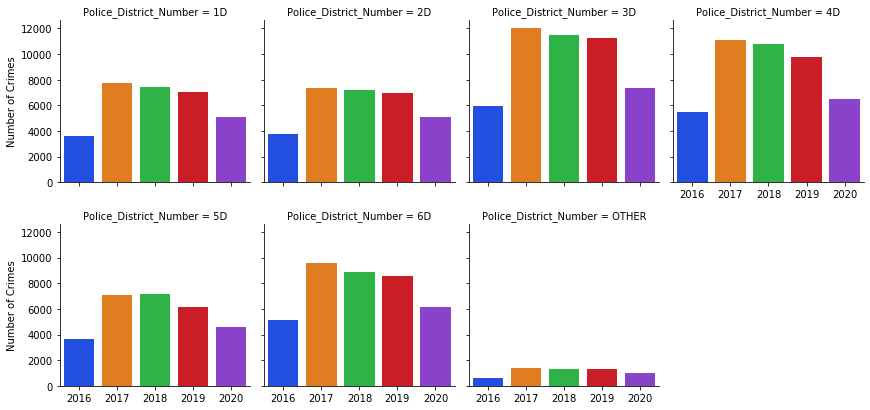

In [94]:
# MBUI: Distribution of crimes by Police District over time
sns.set_palette(sns.color_palette("bright"))
fig5 = sns.catplot(x="Year", col="Police_District_Number", 
                   col_wrap=4,
                   data=df_c2,
                   col_order = ['1D','2D','3D','4D','5D','6D','OTHER'],
                   kind="count", 
                   height=3, 
                   aspect=1)
fig5.set_axis_labels("", "Number of Crimes")

In [95]:
# MBUI: Show the number of incidents of each crime types
df_c2.Crime_Name1.value_counts()

Crime Against Property    98217
Crime Against Society     58535
Other                     45164
Crime Against Person      20916
Not a Crime                2717
Name: Crime_Name1, dtype: int64

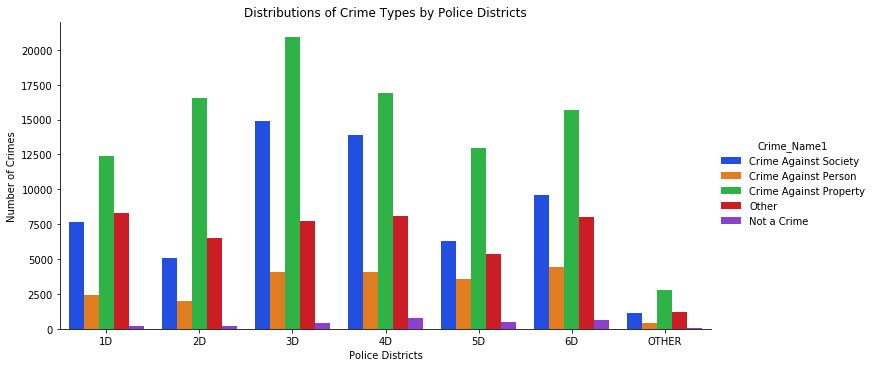

In [96]:
# MBUI: Show number of crimes by crimes types and police disctricts
sns.catplot(x="Police_District_Number", data=df_c2, aspect=2, kind='count', hue='Crime_Name1', order=['1D','2D','3D','4D','5D','6D','OTHER'])
plt.xlabel("Police Districts")
plt.ylabel("Number of Crimes")
plt.title("Distributions of Crime Types by Police Districts")
plt.show()

# <center> Bootstrapping </center>

In [97]:
# MBUI: Load Police Stations dataset that shows the coordinates of police districts
station = pd.read_csv('Police_Stations.csv')

In [98]:
# MBUI: Add the coordinates to Crime dataset
df_c2 = df_c2.merge(station, on = "Police_District_Number")
df_c2.head()

,Incident_ID,Offence_Code,CR_Number,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Start_Date_Time,Police_District_Number,Longitude,Latitude,Year,Latitude_1,Longitude_1
0,201087097,5707,16033232,1,Crime Against Society,Trespass of Real Property,TRESPASSING,2016-07-01 00:04:00,4D,-77.080827,39.078911,2016,39.058373,-77.048394
1,201210623,2610,180051606,1,Crime Against Property,Identity Theft,IDENTITY THEFT,2018-10-15 13:04:00,4D,-77.086426,39.047285,2018,39.058373,-77.048394
2,201257007,2303,190044554,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,2019-09-17 15:30:00,4D,-77.077657,39.083822,2019,39.058373,-77.048394
3,201087177,9199,16033299,1,Other,All Other Offenses,POLICE INFORMATION,2016-07-01 10:07:00,4D,-77.080827,39.078911,2016,39.058373,-77.048394
4,201087211,4199,16033382,1,Crime Against Society,Liquor Law Violations,LIQUOR (DESCRIBE OFFENSE),2016-07-01 19:48:00,4D,-77.079083,39.086244,2016,39.058373,-77.048394


In [99]:
# MBUI: Calculate the distance between the police station and incident location and add to distance_vincenty list
distance_vincenty = []
for i in df_c2.index:
    distance_vincenty.append(round(vincenty((df_c2['Latitude_1'][i], df_c2['Longitude_1'][i]), 
                                            (df_c2['Latitude'][i], df_c2['Longitude'][i]), miles=True), 3))

In [100]:
# MBUI: Add the Distance column to Crime dataset
df_c2['Distance'] = distance_vincenty
df_c2.head()

,Incident_ID,Offence_Code,CR_Number,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Start_Date_Time,Police_District_Number,Longitude,Latitude,Year,Latitude_1,Longitude_1,Distance
0,201087097,5707,16033232,1,Crime Against Society,Trespass of Real Property,TRESPASSING,2016-07-01 00:04:00,4D,-77.080827,39.078911,2016,39.058373,-77.048394,2.247
1,201210623,2610,180051606,1,Crime Against Property,Identity Theft,IDENTITY THEFT,2018-10-15 13:04:00,4D,-77.086426,39.047285,2018,39.058373,-77.048394,2.184
2,201257007,2303,190044554,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,2019-09-17 15:30:00,4D,-77.077657,39.083822,2019,39.058373,-77.048394,2.358
3,201087177,9199,16033299,1,Other,All Other Offenses,POLICE INFORMATION,2016-07-01 10:07:00,4D,-77.080827,39.078911,2016,39.058373,-77.048394,2.247
4,201087211,4199,16033382,1,Crime Against Society,Liquor Law Violations,LIQUOR (DESCRIBE OFFENSE),2016-07-01 19:48:00,4D,-77.079083,39.086244,2016,39.058373,-77.048394,2.534


In [101]:
# MBUI: Five number summary of Distance
df_c2.Distance.describe()

count    219950.000000
mean         17.462724
std         283.497284
min           0.018000
25%           1.460000
50%           2.595000
75%           3.946000
max        5539.535000
Name: Distance, dtype: float64

In [102]:
# MBUI: Create function to calculate median
def median(list):
    list.sort()
    l = len(list)
    
    mid = (l-1)//2
    
    if (l%2 == 0):
        return (list[mid] + list[mid+1])/2
    else:
        return list[mid]

In [103]:
# MBUI: Generate random samples from Distance variable and find the median of each sample
original_sample = np.random.choice(df_c2.Distance, 22555, replace = False)
median_boot_samples = []
for i in range(1000):
                boot_sample = np.random.choice(original_sample, 22555)
                median_boot_samples.append(median(boot_sample))
median(list(median_boot_samples))

2.592

In [104]:
# MBUI: Resample Distance variable and find the median
from sklearn.utils import resample
median_boot_samples_1 = []
for i in range(1000):
                boot_sample_1 = resample(original_sample) 
                median_boot_samples_1.append(median(list(boot_sample_1)))
median(list(median_boot_samples_1))

2.592

In [105]:
conf_int = np.percentile(median_boot_samples, [2.5, 97.5])
conf_int

array([2.55    , 2.626025])

# <center> Conclusions </center>

There is a clear reduction in crimes when the stay-at-home order was in place in the county.
It is also interesting to analyze more in detail the result of our Median for the distance of each crime reported to the nearest police station. This median ($=2.595\ miles$) is not so powerful if analyzed alone. One could argue that 2.6 miles is not a long distance, leading to the conclusion that the position of the police stations is relatively efficient since police are half of the time closer than 2.6 miles to the incident. However, it would be more useful to know data about how long it takes for police to arrive at each scene and compare those data to our dataset. It would also be useful to know national data to compare the realtive efficiency of Montgomery County Police Department to other police departments in the nation.